# Mapa das escolas do RS por Taxa de distorçao de serie

In [1]:
#!pip install folium

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import requests
%matplotlib inline

In [3]:
url = 'http://dados.fee.tche.br/ckan-download/fee-2013-mun-taxa-de-distorcao-idade-serie-total-102524.csv'
df = pd.read_csv(url, encoding='latin1', skiprows=1)
df.head()

,Município,ibge,latitude,longitude,/Educação/Ens...de Série/Total 2013 (-)
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [4]:
#renomeando colunas
df = df.rename(columns={'/Educação/Ens...de Série/Total 2013 (-)': 'tx_distorcao'})

In [5]:
df.head()

,Município,ibge,latitude,longitude,tx_distorcao
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Município     495 non-null    object 
 1   ibge          495 non-null    int64  
 2   latitude      495 non-null    float64
 3   longitude     495 non-null    float64
 4   tx_distorcao  495 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 19.5+ KB


In [7]:
#Vamos converte tx_distorçao para float

#Primeiro vamos trocar virgula por ponto
#df['tx_distorcao'] = df['tx_distorcao'].str.replace(',', '.')

df['tx_distorcao'] = df['tx_distorcao'].apply(lambda x: x.replace(',', '.'))

In [8]:
#Fazendo a conversao
df['tx_distorcao'] = df['tx_distorcao'].astype(float)

In [9]:
df.head()

,Município,ibge,latitude,longitude,tx_distorcao
0,Aceguá,4300034,-31.86076,-54.16706,25.7
1,Água Santa,4300059,-28.16720,-52.03100,14.7
2,Agudo,4300109,-29.64470,-53.25150,26.4
3,Ajuricaba,4300208,-28.23420,-53.77570,24.1
4,Alecrim,4300307,-27.65790,-54.76490,18.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Município     495 non-null    object 
 1   ibge          495 non-null    int64  
 2   latitude      495 non-null    float64
 3   longitude     495 non-null    float64
 4   tx_distorcao  495 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.5+ KB


In [11]:
# 10 municipios com menor taxa de distorçao
df.nsmallest(10, 'tx_distorcao')

,Município,ibge,latitude,longitude,tx_distorcao
490,Vista Alegre do Prata,4323606,-28.8052,-51.7946,2.6
375,Santo Antônio do Palma,4317558,-28.4956,-52.0267,4.3
28,Áurea,4301552,-27.6936,-52.0505,5.8
268,Nicolau Vergueiro,4312674,-28.5298,-52.4676,7.0
128,Derrubadas,4306320,-27.2642,-53.8645,7.4
119,Cotiporã,4305959,-28.9891,-51.6971,7.5
68,Campestre da Serra,4303673,-28.7926,-51.0941,7.6
476,Vanini,4322558,-28.4758,-51.8447,7.8
236,Linha Nova,4311643,-29.4679,-51.2003,8.0
392,São José do Inhacorá,4318499,-27.7251,-54.1275,8.0


In [12]:
# 10 municipios com maior taxa de distorçao
df.nlargest(10, 'tx_distorcao')

,Município,ibge,latitude,longitude,tx_distorcao
307,Pedras Altas,4314175,-31.7217,-53.5838,56.0
316,Pinheiro Machado,4314506,-31.5794,-53.3798,53.9
17,Arambaré,4300851,-30.9093,-51.5046,52.8
140,Eldorado do Sul,4306767,-30.0847,-51.6187,51.9
35,Barra do Quaraí,4301875,-30.2029,-57.5497,51.5
393,São José do Norte,4318507,-32.0151,-52.0331,49.4
413,São Valério do Sul,4319737,-27.7906,-53.9368,49.2
193,Hulha Negra,4309654,-31.4067,-53.8667,49.0
106,Chuí,4305439,-33.6866,-53.4594,48.6
233,Lavras do Sul,4311502,-30.8071,-53.8931,47.7


<AxesSubplot:ylabel='Frequency'>

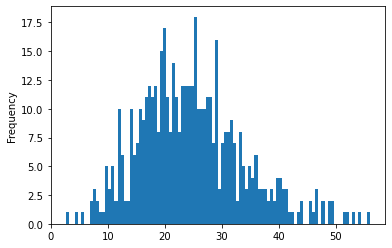

In [13]:
#plota o histograma da tx distorçao

df['tx_distorcao'].plot.hist(bins=100)

In [14]:
#Quantidade de municipios com tx_distorcao menor ou igual a 10
df[df['tx_distorcao'] <= 10].count()

Município       17
ibge            17
latitude        17
longitude       17
tx_distorcao    17
dtype: int64

In [15]:
#Quantidade de municipios com tx_distorcao maior ou igual a 45
df[df['tx_distorcao'] >= 45].count()

Município       17
ibge            17
latitude        17
longitude       17
tx_distorcao    17
dtype: int64

In [16]:
#Criar um mapa, com base de uma coordenada central

brasil = folium.Map(
    location=[-13.6596965, -69.6860374], #Cordenadas do google maps
    zoom_start=4
)

#Mostra o mapa
brasil

In [17]:
# vamos criar o mapa do RS
rs = folium.Map(
    location=[-30.4157948, -53.6698331],
    zoom_start=5
)
rs

In [18]:
# pecorrer o dataframe com base nas melhores escolas (tx_distorçao <=10)
# e desenha um marcador para cada escola
# usando for e iterrows

for indice, municipio in df[df['tx_distorcao'] <= 10].iterrows():
    folium.Marker(
        location=[municipio['latitude'], municipio['longitude']],
        popup=municipio['Município'],
        icon=folium.map.Icon(color='green')
    ).add_to(rs)
    
rs

In [19]:
# pecorrer o dataframe com base nas piores escolas (tx_distorçao >=45)
# e desenha um marcador para cada escola
# usando for e iterrows

for indice, municipio in df[df['tx_distorcao'] >= 45].iterrows():
    folium.Marker(
        location=[municipio['latitude'], municipio['longitude']],
        popup=municipio['Município'],
        icon=folium.map.Icon(color='red')
    ).add_to(rs)
    
rs